ETL
GROUP 5 - Week 8 Assessment

Introduction goes here

Extraction:

In [1]:
## IMPORTS ##
import requests
import pandas as pd
import matplotlib.pyplot as plt

# API Key:
YOUR_KEY_GOES_HERE = '066f200201e5d0520681248f2678af0750c0e043'

# Calls: NAME, GEO_ID, NAICS2017_LABEL, EMPSZFI, EMPSZFI_LABEL, and FIRMPDEMP from Annual Buisness Survey:
# https://www.census.gov/data/developers/data-sets/abs.2019.html
responseCustomABS = requests.get('https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP,EMP,PAYANN&for=state:53,22,19&NAICS2017=00&key=' + YOUR_KEY_GOES_HERE)

# Saves requested data with json format.
data1 = responseCustomABS.json()

Transformation:

In [2]:
def normalizerwashington(value):
    return value/washingtonSumOver20
def normalizerlouisiana(value):
    return value/louisianaSumOver20
def normalizeriowa(value):
    return value/iowaSumOver20
def firmrelabler(value):
    if value == 'All firms':
        value = 'All firms'
        return value
    if value == 'Firms with no employees':
        value = 'None'
        return value
    if value == 'Firms with 1 to 4 employees':
        value = '1-4'
        return value
    if value == 'Firms with 5 to 9 employees':
        value = '5-9'
        return value
    if value == 'Firms with 10 to 19 employees':
        value = '10-19'
        return value
    if value == 'Firms with 20 to 49 employees':
        value = '20-49'
        return value
    if value == 'Firms with 50 to 99 employees':
        value = '50-99'
        return value
    if value == 'Firms with 100 to 249 employees':
        value = '100-249'
        return value
    if value == 'Firms with 250 to 499 employees':
        value = '250-499'
        return value
    if value == 'Firms with 500 employees or more':
        value = '500+'
        return value
def staterelabler(value):
    if value == 'Washington':
        value = 'WA'
        return value
    if value == 'Louisiana':
        value = 'LA'
        return value
    if value == 'Iowa':
        value = 'IA'
        return value
def normalizer(value):
    if value == 148872.0:
        return value/washingtonPop
    if value == 60610.0:
        return value/iowaPop
    if value == 76877.0:
        return value/louisianaPop
louisianaPop  = 4648794
washingtonPop = 7614893
iowaPop       = 3155070
# Saves data in pandas data frame:
censusTable = pd.DataFrame(data1)

# Reasigns the header of the table to the first row:
new_header2  = censusTable.iloc[0]
censusTable  = censusTable[1:]
censusTable.columns = new_header2
censusTable['FIRMPDEMP'] = censusTable['FIRMPDEMP'].astype(float)
censusTable['EMP'] = censusTable['EMP'].astype(float)
censusTable['PAYANN'] = censusTable['PAYANN'].astype(float)

# Shortens the labels of breakout groups and state names for ease of graphing.
censusTable['EMPSZFI_LABEL'] = censusTable['EMPSZFI_LABEL'].apply(firmrelabler)
censusTable['NAME'] = censusTable['NAME'].apply(staterelabler)

# Drops useless or now uneccissary data.
censusTable = censusTable.drop(['GEO_ID','NAICS2017_LABEL','NAICS2017','state'], axis = 1)

# Splits main table into four tables to ease statistical analysis:
censusTableWashington = censusTable[censusTable.NAME == 'WA'].iloc[6:,:]
censusTableLouisiana = censusTable[censusTable.NAME == 'LA'].iloc[6:,:]#.drop(21)
censusTableIowa = censusTable[censusTable.NAME == 'IA'].iloc[6:,:]#.drop(11)
censusTableState = censusTable[censusTable.EMPSZFI == '001']

#Sets up new table to store normalized data.
censusTableStateNormalized = censusTableState
# Normalized firm number by employees
censusTableStateNormalized['FIRMPDEMP_NormalEmp'] = censusTableStateNormalized['FIRMPDEMP'].divide(censusTableStateNormalized['EMP'], axis = 0)
# Normalized total annual pay by employees
censusTableStateNormalized['PAYANN_div_EMP'] = censusTableStateNormalized['PAYANN'].divide(censusTableStateNormalized['EMP'], axis = 0)
# Normalized firm number by population
censusTableStateNormalized['FIRMPDEMP_NormalPop'] = censusTableStateNormalized['FIRMPDEMP'].apply(normalizer)


# creates normalizing factors for each state table
washingtonSumOver20 = censusTableWashington['FIRMPDEMP'].sum()
louisianaSumOver20 = censusTableLouisiana['FIRMPDEMP'].sum()
iowaSumOver20 = censusTableIowa['FIRMPDEMP'].sum()

# Normalizes each states table with factor above
censusTableWashington['FIRMPDEMP'] = censusTableWashington['FIRMPDEMP'].apply(normalizerwashington)
censusTableLouisiana['FIRMPDEMP']  = censusTableLouisiana['FIRMPDEMP'].apply(normalizerlouisiana)
censusTableIowa['FIRMPDEMP']       = censusTableIowa['FIRMPDEMP'].apply(normalizeriowa)

print(censusTable)
# print (censusTableStateNormalized)
# print (censusTableWashington)
# print (censusTableLouisiana)
# print (censusTableIowa)

0  NAME EMPSZFI EMPSZFI_LABEL  FIRMPDEMP        EMP       PAYANN
1    WA     001     All firms   148872.0  2752850.0  173854547.0
2    WA     611          None    18866.0        0.0    1102917.0
3    WA     612           1-4    69987.0   140023.0    5745357.0
4    WA     620           5-9    24182.0   160119.0    6762176.0
5    WA     630         10-19    16847.0   225996.0    9756059.0
6    WA     641         20-49     9527.0   272905.0   13054324.0
7    WA     642         50-99     3232.0   194508.0   10629512.0
8    WA     651       100-249     2094.0   229669.0   13247547.0
9    WA     652       250-499     1121.0   179537.0    8020043.0
10   WA     657          500+     3019.0  1350093.0  105536612.0
11   IA     001     All firms    60610.0  1341265.0   61255559.0
12   IA     611          None     6647.0        0.0     401849.0
13   IA     612           1-4    29169.0    57899.0    1865315.0
14   IA     620           5-9     8828.0    58282.0    2045194.0
15   IA     630         1

C:\Users\EDDYDO~1\AppData\Local\Temp/ipykernel_13800/2460237537.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censusTableStateNormalized['FIRMPDEMP_NormalEmp'] = censusTableStateNormalized['FIRMPDEMP'].divide(censusTableStateNormalized['EMP'], axis = 0)
C:\Users\EDDYDO~1\AppData\Local\Temp/ipykernel_13800/2460237537.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  censusTableStateNormalized['PAYANN_div_EMP'] = censusTableStateNormalized['PAYANN'].divide(censusTableStateNormalized['EMP'], axis = 0

Loading (Creating Graphs):

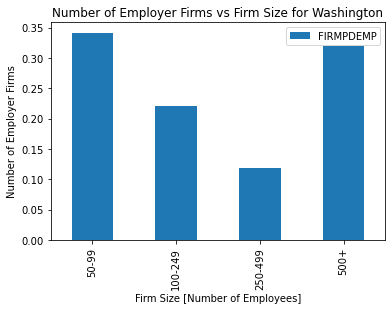

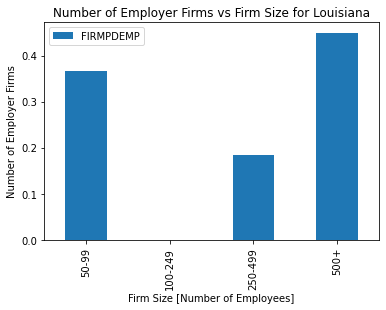

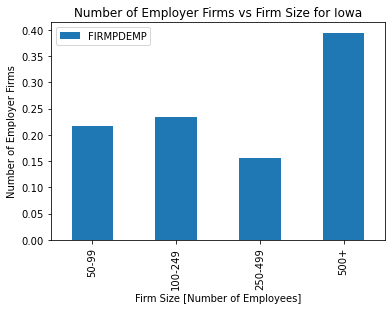

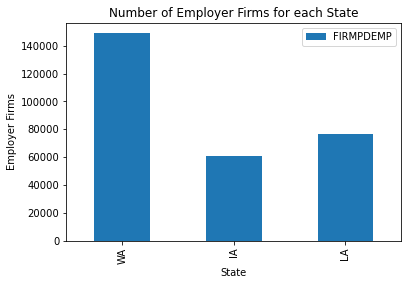

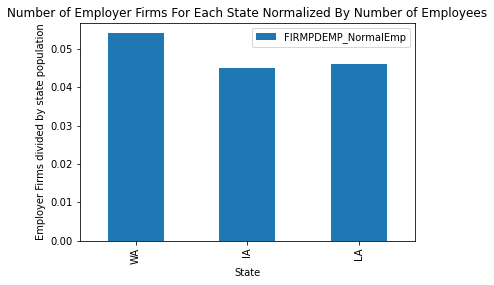

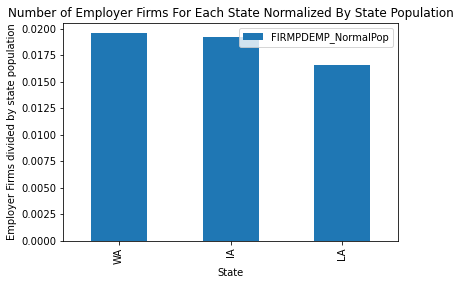

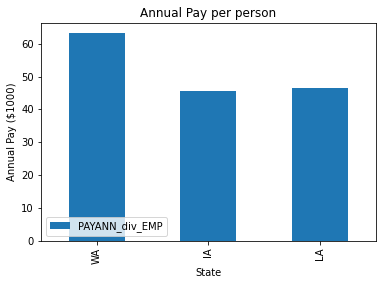

In [14]:
# First Graph
ax1 = censusTableWashington.plot(title = 'Number of Employer Firms vs Firm Size for Washington', kind='bar', y='FIRMPDEMP', x='EMPSZFI_LABEL')
ax1.set_ylabel('Number of Employer Firms')
ax1.set_xlabel("Firm Size [Number of Employees]")
# Second Graph
ax2 = censusTableLouisiana.plot(title = 'Number of Employer Firms vs Firm Size for Louisiana', kind='bar', y='FIRMPDEMP', x='EMPSZFI_LABEL')
ax2.set_ylabel('Number of Employer Firms')
ax2.set_xlabel("Firm Size [Number of Employees]")
# Third Graph
ax3 = censusTableIowa.plot(title = 'Number of Employer Firms vs Firm Size for Iowa', kind='bar', y='FIRMPDEMP', x='EMPSZFI_LABEL')
ax3.set_ylabel('Number of Employer Firms')
ax3.set_xlabel("Firm Size [Number of Employees]")
# Fourth Graph
ax4 = censusTableState.plot(title = 'Number of Employer Firms for each State', kind='bar', y='FIRMPDEMP', x='NAME')
ax4.set_ylabel('Employer Firms')
ax4.set_xlabel("State")
# Fifth Graph
ax5 = censusTableStateNormalized.plot(title = 'Number of Employer Firms For Each State Normalized By Number of Employees', kind='bar', y='FIRMPDEMP_NormalEmp', x='NAME')
ax5.set_ylabel('Employer Firms divided by state population')
ax5.set_xlabel("State")
# Sixth Graph
ax5 = censusTableStateNormalized.plot(title = 'Number of Employer Firms For Each State Normalized By State Population', kind='bar', y='FIRMPDEMP_NormalPop', x='NAME')
ax5.set_ylabel('Employer Firms divided by state population')
ax5.set_xlabel("State")
# Seventh Graph
ax5 = censusTableStateNormalized.plot(title = 'Annual Pay per person', kind='bar', y='PAYANN_div_EMP', x='NAME')
ax5.set_ylabel('Annual Pay ($1000)')
ax5.set_xlabel("State")

plt.legend(loc=3)
plt.show()

Second ETL:

Querying API and getting data We get the name of the place, as well as the years it's been in business, the labels for the same (so the data is intelligible), ethnic groups, ethnic group IDs, how much money the company makes, and how many employees it has. Along with the total number of companies.
Finally, it's worth noting that we get the data for all states at the start.

In [15]:
import requests
import json
import pandas as pd
#We set our API key
key = '066f200201e5d0520681248f2678af0750c0e043'
import matplotlib.pyplot as plt
if __name__ == '__main__':
    #We have to query
    response = requests.get(
        'https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,RCPSZFI,YIBSZFI,YIBSZFI_LABEL,VET_GROUP,ETH_GROUP,ETH_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&key=' + key)
    jsonResponse = response.json()

Transforming the Data We first construct our pandas DataFrame object. We then convert the numerical data to integers, since it was originally taken in as strings.

In [16]:
    beheaded = jsonResponse[1:]
    frenchPanda = pd.DataFrame(beheaded, columns = jsonResponse[0])
    frenchPanda['FIRMPDEMP'] = frenchPanda['FIRMPDEMP'].apply(int)
    frenchPanda['YIBSZFI'] = frenchPanda['YIBSZFI'].apply(int)
    frenchPanda['YIBSZFI'] = frenchPanda['YIBSZFI'].apply(int)
    frenchPanda['RCPSZFI'] = frenchPanda['RCPSZFI'].apply(int)
    frenchPanda['EMPSZFI'] = frenchPanda['EMPSZFI'].apply(int)

Creating the visualizations.
We now make different scatterplots of the US-wide data. Each state represents a data point, and we are comparing how long a firm has existed to how much money it makes, as well as how many employees it has vs. how much money it makes. It's important to note that we're taking aggregates here-since we don't have individual firm data, we are in this case looking at each individual state. If they have a large number of large firms, we look at the number of firms that they

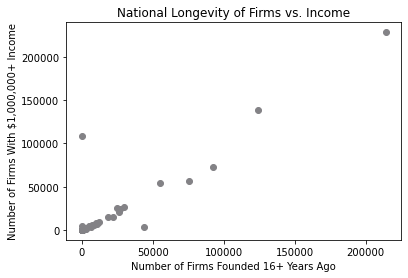

In [17]:
    sixteen = frenchPanda[frenchPanda.YIBSZFI == 323].drop_duplicates('NAME')
    million = frenchPanda[frenchPanda.RCPSZFI == 532].drop_duplicates('NAME')
    plot1 = plt.scatter(sixteen['FIRMPDEMP'], million['FIRMPDEMP'], c='#838286')
    plt.xlabel('Number of Firms Founded 16+ Years Ago')
    plt.ylabel('Number of Firms With $1,000,000+ Income')
    plt.title('National Longevity of Firms vs. Income')
    plt.show()

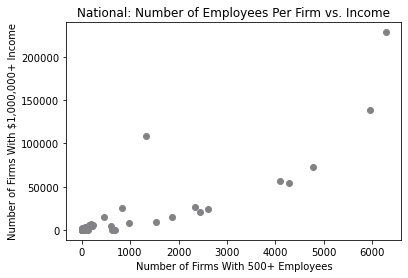

In [18]:
    bigFirm = frenchPanda[frenchPanda.EMPSZFI == 657].drop_duplicates('NAME')
    million = frenchPanda[frenchPanda.RCPSZFI == 532].drop_duplicates('NAME')
    plot1 = plt.scatter(bigFirm['FIRMPDEMP'], million['FIRMPDEMP'], c='#838286')
    plt.xlabel('Number of Firms With 500+ Employees')
    plt.ylabel('Number of Firms With $1,000,000+ Income')
    plt.title('National: Number of Employees Per Firm vs. Income')
    plt.show()

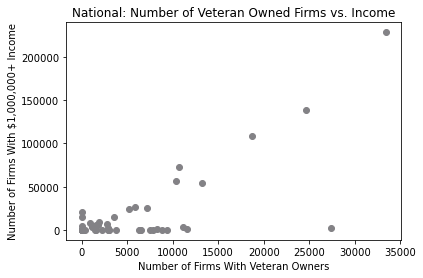

In [19]:
    vetOwned = frenchPanda[frenchPanda.VET_GROUP == '002'].drop_duplicates('NAME')
    plot2 = plt.scatter(vetOwned['FIRMPDEMP'], million['FIRMPDEMP'], c='#838286')
    plt.xlabel('Number of Firms With Veteran Owners')
    plt.ylabel('Number of Firms With $1,000,000+ Income')
    plt.title('National: Number of Veteran Owned Firms vs. Income')
    plt.show()

Import: Before running the ETL several python packages had to be imported first for extraction, transformation, loading, and exploratory visual analysis of the data. They are displayed in the code below.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import squarify

ModuleNotFoundError: No module named 'seaborn'

Extraction: The data was obtained from the US Census Bureau using their API service. To use their service one must first obtain a valid key for querying the census data (found here: https://api.census.gov/data/key_signup.html) and activate the key. Once activated one can call on the CENSUS API for data. To do so however requires that the URL for the API call be constructed in a prticular way. To learn more about how to construct URLs for Census API calls refer to the Census API user guide (https://www.census.gov/content/dam/Census/data/developers/api-user-guide/api-guide.pdf). Once the URL is constructed in the correct manner and calls on the variables (columns) we'd like to view all thats left is to combine the URL with the key (as seen in the code chunk below) and to call on the API using the 'requests' python package and the .get() function (see below). In the user guide it states that API calls are returned in JSON format as a 2d array (i.e., this will be a list of lists in python where each list item will be a row of data with the first row being column headings). In the code chunk below I call on the census API with my desired vairables and use the .json() fucntion to turn my api call into a List of lists object to be used for tranfromation.

In [2]:
key = '6de97c8811e1d6088eb1f8229ec815ff61ba547f'
compSumStateURL = 'https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,' \
                  'ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMP,FIRMPDEMP&for=state:19,22,' \
                  '53&NAICS2017=00&key='

compSumStateURLResponse = requests.get(compSumStateURL + key)
jsonR = compSumStateURLResponse.json()

NameError: name 'requests' is not defined

Tranformation: Due to the way the API is set up, calling the api everytime we want to use the data is not very quick or efficient therefore the list of data that was obtained was turned into a CSV.

In [4]:
CensusTable = pd.DataFrame(jsonR) # The List of lists is turned into a pandas dataframe
new_header2 = CensusTable.iloc[0] # The first row of the frame is saved as new_header2
CensusTable = CensusTable[1:] # The rest of the rows are saved as a new table
CensusTable.columns = new_header2 # The first row (new_header2) is assigned to the column names for the census table
CensusTable.to_csv('APICensusTable.csv') # Convert the dataframe to a CSV
FullTable = pd.read_csv('APICensusTable.csv')# Read in the CSV and at this point the API is no longer being called for subsequent runs
FullTable.drop(['Unnamed: 0', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'VET_GROUP'], axis=1, inplace=True)# during CSV creation an unnamed column was created. 
# That column was dropped along with the sex, eth-group, race-group, and vet-group as they were simply codes.
# the label version of each column was kept as it gave the actualy meaning to each code in the respective group columns.

# In the origianl API call we called on 3 states and had to break up the big table into three for each state:
WashingtonTable = FullTable[FullTable.NAME == 'Washington']
IowaTable = FullTable[FullTable.NAME == 'Iowa']
LouisianaTable = FullTable[FullTable.NAME == 'Louisiana']

# Once that was done the tables were already clean with no null entries, errors, or duplicate rows
# That essentially concludes the cleaning that needed to be done.

NameError: name 'jsonR' is not defined

Load: Lastly, for the load portion there is no code to write as any further loads will be done by simply calling the CSV that was created above using the pandas .read_csv() function.

Visuals: The Code for the visuals are given below. For my portion of analysis I only did visuals for Iowa as that was what I was assigned to focus on.

In [5]:
IowaSxTb = IowaTable[(IowaTable.SEX_LABEL == 'Male') | (IowaTable.SEX_LABEL == 'Female') | (IowaTable.SEX_LABEL == 'Equally male/female')]
# print(IowaSxTb.to_markdown())
IowaSxTb = IowaSxTb[(IowaSxTb.ETH_GROUP_LABEL == 'Total') & (IowaSxTb.RACE_GROUP_LABEL == 'Total') & (IowaSxTb.VET_GROUP_LABEL == 'Total')]
# print(IowaSxTb.to_markdown())

# After filtering the above data down to Iowa and the appropriate fields and rows the code below is used to construct
# a treemap of the number of employer firms owned mainly by men, women, and equally.
colors = sns.color_palette('pastel')[0:3]
squarify.plot(sizes=IowaSxTb['FIRMPDEMP'], label=IowaSxTb['SEX_LABEL'], alpha=0.8, value=IowaSxTb['FIRMPDEMP'], color=colors)
plt.axis('off')
plt.title('Number of employer firms split by weather ownership is mainly male, female, or equal (Iowa)')
plt.show()

# The Code below uses the same filtered table to create a bar chart that shows how many employees work under
# mainly male, female, or equally owned businesses
plt.title('Number of employees under males and female business owners in Iowa')
plt.bar(IowaSxTb['SEX_LABEL'], IowaSxTb['EMP'])
plt.xlabel('Sex')
plt.ylabel('Number of employees')
plt.show()

# Next the table continaing data for Iowa was refiltered so that we could create a visual for how many employer firms there
# are split first by sex ownership (male, female, or equal) and then by race ownership.

IowaRaTable = IowaTable[(IowaTable.SEX_LABEL == 'Male') | (IowaTable.SEX_LABEL == 'Female') | (IowaTable.SEX_LABEL == 'Equally male/female')]
IowaRaTable = IowaRaTable[(IowaRaTable.ETH_GROUP_LABEL == 'Total') & (IowaRaTable.RACE_GROUP_LABEL != 'Total') & (IowaRaTable.VET_GROUP_LABEL == 'Total')]
IowaRaTable = IowaRaTable[(IowaRaTable.RACE_GROUP_LABEL != 'Equally minority/nonminority') & (IowaRaTable.RACE_GROUP_LABEL != 'Minority') & (IowaRaTable.RACE_GROUP_LABEL != 'Nonminority')]

# print(IowaRaTable.to_markdown())

StackBarData = IowaRaTable.groupby(['SEX_LABEL', 'RACE_GROUP_LABEL']).agg({'FIRMPDEMP':['sum']}).unstack()

# print(StackBarData.to_markdown())
# print(StackBarData.loc['Female', 'FIRMPDEMP'].loc['sum'])

# The code below creates a stacked barchart with the x-axis containing the male, female, and equal categories on the bottom
# and the bars themselves being split by race demographics.

StackBarData.plot(kind='bar', stacked=True)
plt.legend(labels=StackBarData.loc['Female', 'FIRMPDEMP'].loc['sum'].index)
plt.xticks(rotation=0)
plt.xlabel("Sex")
plt.ylabel('Number of employer firms')
plt.title('Number of employer firms, with ownership split by sex and race')
plt.show()

NameError: name 'IowaTable' is not defined

Extraction:

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None, "display.max_columns", None)
# My API key, this will be added to the API call in order to get the desired data.
YOUR_KEY_GOES_HERE = '2ba1e25e0a0f98448e41e3177482a636bcbd379a'
# The API call, for these visualizations, we are grabbing the number of employer firms, the race of the firm owner, and
# the states Louisiana, Washington, and Iowa.
responseCustomETH = requests.get(
    'https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,FIRMPDEMP,RACE_GROUP,RACE_GROUP_LABEL&for=state:53,22,19&NAICS2017=00&key=' + YOUR_KEY_GOES_HERE)
# Converting the data into JSON format, doing so makes it easier to conver the data into a Pandas dataframe.
data1 = responseCustomETH.json()
# Now we convert the data into the dataframe, doing this will make it easy to transform the data, and create visualizations
# with the Census data collected.
censusTable = pd.DataFrame(data1)
# A print statement to confirm the datafram is correct, the data can now easily be transformed.
print(censusTable)

Transformation:

In [ ]:
new_header2 = censusTable.iloc[0]
censusTable = censusTable[1:]
censusTable.columns = new_header2
# censusTable = censusTable.drop_duplicates
# print(censusTable)
# Changing the type of the number of employer firms to float. It was grabbed as a string from the API.
censusTable['FIRMPDEMP'] = censusTable['FIRMPDEMP'].astype(float)
# Grabbing the data only meant for Washington, this allows me to create the visualization out of this data.
censusTableWashington = censusTable[censusTable.NAME == 'Washington']
# Grabbing the Louisiana data, same as for Washington to create a visualization solely for that state.
censusTableLouisiana = censusTable[censusTable.NAME == 'Louisiana']
# Grabbing the Iowa data from the dataframe.
censusTableIowa = censusTable[censusTable.NAME == 'Iowa']
# With the data separated into their respective states, we will now take out extraneous data to make our tables more
# accessible for readers.
# We will remove the race groups of minority, nonminority, equally minority/nonminority, and total because they aren't helpful;
# and Native Hawaiian and Other Pacific Islander due to the extremely small amount instances found in the data.

Load:

In [ ]:
# Washington business owners by race
# With each filter put onto the table, the table will be updated with that race group label removed. This was done instead of
# creating new tables each runthrough of the tables.
tableRaceFirms = censusTableWashington[censusTableWashington.RACE_GROUP_LABEL != 'Nonminority']
tableRaceFirms = tableRaceFirms[tableRaceFirms.RACE_GROUP_LABEL != 'Minority']
tableRaceFirms = tableRaceFirms[tableRaceFirms.RACE_GROUP_LABEL != 'Equally minority/nonminority']
tableRaceFirms = tableRaceFirms[tableRaceFirms.RACE_GROUP_LABEL != 'Total']
tableRaceFirms = tableRaceFirms[tableRaceFirms.RACE_GROUP_LABEL != 'Native Hawaiian and Other Pacific Islander']
# The steps performed for Washington will be the same for Iowa and Louisiana, removing the same groups from each table.

# Iowa business owners by race
tableRaceFirmsIA = censusTableIowa[censusTableIowa.RACE_GROUP_LABEL != 'Nonminority']
tableRaceFirmsIA = tableRaceFirmsIA[tableRaceFirmsIA.RACE_GROUP_LABEL != 'Minority']
tableRaceFirmsIA = tableRaceFirmsIA[tableRaceFirmsIA.RACE_GROUP_LABEL != 'Equally minority/nonminority']
tableRaceFirmsIA = tableRaceFirmsIA[tableRaceFirmsIA.RACE_GROUP_LABEL != 'Total']
tableRaceFirmsIA = tableRaceFirmsIA[tableRaceFirmsIA.RACE_GROUP_LABEL != 'Native Hawaiian and Other Pacific Islander']

# Louisiana business owners by race
tableRaceFirmsLA = censusTableLouisiana[censusTableLouisiana.RACE_GROUP_LABEL != 'Nonminority']
tableRaceFirmsLA = tableRaceFirmsLA[tableRaceFirmsLA.RACE_GROUP_LABEL != 'Minority']
tableRaceFirmsLA = tableRaceFirmsLA[tableRaceFirmsLA.RACE_GROUP_LABEL != 'Equally minority/nonminority']
tableRaceFirmsLA = tableRaceFirmsLA[tableRaceFirmsLA.RACE_GROUP_LABEL != 'Total']
tableRaceFirmsLA = tableRaceFirmsLA[tableRaceFirmsLA.RACE_GROUP_LABEL != 'Native Hawaiian and Other Pacific Islander']